![Billboard banner](https://www.clipartkey.com/mpngs/m/62-628657_billboard-logo-png-billboard-top-100.png)

# K Nearest Neighbor Classifier Model 

In [1]:
# Import the neccessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import preprocessing
print("All neccessary libraries imported")

All neccessary libraries imported


In [2]:
# Raw data from Resources directory (change the link as needed)
attribute_data = "Resources/BillboardFromLast20/songAttributes_1999-2019.csv"

In [3]:
# Read the wildfire data into a dataframe
df_attributes = pd.read_csv(attribute_data)
# Drop the columns with string values
df_attributes.drop(columns=['Unnamed: 0','Album','Artist','Name'],inplace=True)
# Convert the boolean column to integer
df_attributes["Explicit"] = df_attributes["Explicit"].astype(int)
# Let's see the shape and the first 5 rows of the dataframe
print('\033[1m'+"The shape of the {} dataframe is {}:" .format("attribute",df_attributes.shape)+'\033[0m')
df_attributes.head()

The shape of the attribute dataframe is (154931, 14):


,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0.000728,0.520,234947,0.904,0,0.010300,0.0634,-5.030,1,35,0.0309,106.022,4,0.365
1,0.018200,0.581,239573,0.709,0,0.000664,0.1740,-4.909,1,31,0.0282,120.027,4,0.408
2,0.000473,0.572,198400,0.918,0,0.000431,0.0977,-3.324,0,30,0.0559,144.061,4,0.370
3,0.000970,0.596,231453,0.661,0,0.000033,0.1130,-5.051,1,35,0.0254,111.975,4,0.183
4,0.000036,0.520,222520,0.808,0,0.000010,0.0800,-4.553,0,21,0.0318,92.721,4,0.666


In [4]:
# Let's see the column names in the dataframe
print(df_attributes.columns.tolist())

['Acousticness', 'Danceability', 'Duration', 'Energy', 'Explicit', 'Instrumentalness', 'Liveness', 'Loudness', 'Mode', 'Popularity', 'Speechiness', 'Tempo', 'TimeSignature', 'Valence']


In [5]:
# Basic information of the df_fire dataframe by the info() method
df_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154931 entries, 0 to 154930
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Acousticness      154931 non-null  float64
 1   Danceability      154931 non-null  float64
 2   Duration          154931 non-null  int64  
 3   Energy            154931 non-null  float64
 4   Explicit          154931 non-null  int32  
 5   Instrumentalness  154931 non-null  float64
 6   Liveness          154931 non-null  float64
 7   Loudness          154931 non-null  float64
 8   Mode              154931 non-null  int64  
 9   Popularity        154931 non-null  int64  
 10  Speechiness       154931 non-null  float64
 11  Tempo             154931 non-null  float64
 12  TimeSignature     154931 non-null  int64  
 13  Valence           154931 non-null  float64
dtypes: float64(9), int32(1), int64(4)
memory usage: 16.0 MB


## Create a new column for popularity rank

In [6]:
# Create a new column that bins the popularity from 0-9
df_attributes["Rank"] = df_attributes["Popularity"].apply(lambda x: 'HIT' if x <=10 else 'MISS')
# Let's see the new column
df_attributes.head()

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence,Rank
0,0.000728,0.520,234947,0.904,0,0.010300,0.0634,-5.030,1,35,0.0309,106.022,4,0.365,MISS
1,0.018200,0.581,239573,0.709,0,0.000664,0.1740,-4.909,1,31,0.0282,120.027,4,0.408,MISS
2,0.000473,0.572,198400,0.918,0,0.000431,0.0977,-3.324,0,30,0.0559,144.061,4,0.370,MISS
3,0.000970,0.596,231453,0.661,0,0.000033,0.1130,-5.051,1,35,0.0254,111.975,4,0.183,MISS
4,0.000036,0.520,222520,0.808,0,0.000010,0.0800,-4.553,0,21,0.0318,92.721,4,0.666,MISS


## Creating input and output datasets

In [7]:
import numpy as np
# Create a copy of df_attributes
df_copy = df_attributes.copy()
# Create X and Y numpy arrays
df_y = df_copy[['Rank']].to_numpy() # Keep only the rank column
df_copy.drop(columns=['Popularity','Rank'],inplace=True) # Keep only the attributes
X = df_copy.to_numpy() # Convert the dataframe to numpy array
print('\033[1m'+"Shape of the X dataset: {}".format(X.shape)+'\033[0m')
print('\033[1m'+"Shape of the y dataset: {}".format(df_y.shape)+'\033[0m')

Shape of the X dataset: (154931, 13)
Shape of the y dataset: (154931, 1)


In [8]:
# Creating a numpy one dimensional array for labels
y = df_y.ravel()
y[0:5]

array(['MISS', 'MISS', 'MISS', 'MISS', 'MISS'], dtype=object)

## Creating train and test splits

In [9]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Shape of the train & test set
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (123944, 13) (123944,)
Test set: (30987, 13) (30987,)


## Data Preprocessing

In [10]:
# Importing StandardScaler from sklearn library
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [11]:
# Scaling both test and train data for X dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Creating a K-Nearest-Neighbor(KNN) Classifier 

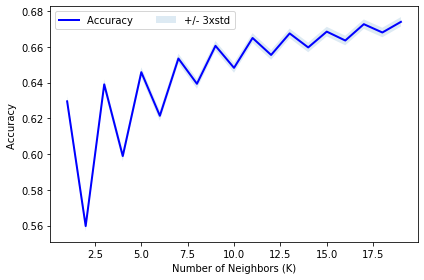

The best accuracy was with 0.674 with k= 19


In [12]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# We can calculate the accuracy of KNN for different Ks.
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
# Calculating accuracy for different Ks
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_scaled,y_train)
    yhat=neigh.predict(X_test_scaled)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
# Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'-b',linewidth=2)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.15)
plt.legend(('Accuracy ', '+/- 3xstd'),fontsize='medium',ncol=2)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
# Print the K value that gives best accuracy
print('\033[1m'+"The best accuracy was with", round(mean_acc.max(),4), "with k=", (mean_acc.argmax()+1))

In [13]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
# k value that gives best accuracy
k = 14
# Create the KNN classifier engine & make prediction
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
# Evaluating the KNN Classifier
print("\033[1m F1 Score: \033[0m \n",metrics.f1_score(y_test,yhat,average='weighted'))
print("\033[1m Classification Report: \033[0m \n",metrics.classification_report(y_test,yhat))

 F1 Score:  
 0.5919010214717713
 Classification Report:  
               precision    recall  f1-score   support

         HIT       0.42      0.25      0.32     10755
        MISS       0.67      0.82      0.74     20232

    accuracy                           0.62     30987
   macro avg       0.55      0.54      0.53     30987
weighted avg       0.59      0.62      0.59     30987



 Confusion Matrix, without normalization 
[[ 2698  8057]
 [ 3657 16575]]


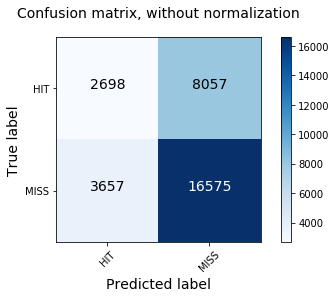

In [14]:
import itertools
from sklearn.metrics import confusion_matrix
# This function prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=14,pad=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("\033[1m Confusion Matrix, without normalization \033[0m")
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],fontsize=14,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label',fontsize=14)
    plt.xlabel('Predicted label',fontsize=14)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['HIT','MISS'],
                      title='Confusion matrix, without normalization')
plt.show()